<a href="https://colab.research.google.com/github/Nickdv9/Netflix_Data_Analytics/blob/main/Netflix_Data_Analytics_%26_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

## Load data

In [2]:
data = pd.read_csv('sample_data/netflix_titles.csv')
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## SweetViz

In [3]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.5 MB/s 


In [4]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Basic analysis

In [5]:
data.shape

(8807, 12)

In [6]:
data.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [7]:
data.isnull().sum().sum()

4307

In [8]:
data.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# Convert date_added to a datetime object

data['date_added'] = pd.to_datetime(data['date_added'])

In [11]:
labels = data['type'].value_counts().index
values = data['type'].value_counts().values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.05])])
fig.update_layout(
        title_text = "Distribution of TV Shows and Movies",
        template = 'plotly_dark',
        width = 600, 
        height = 400
)
fig.show()

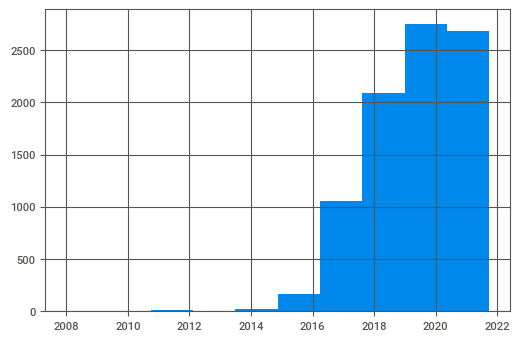

In [12]:
data['date_added'].hist()

## Analysis of show releases

In [ ]:
def generate_plots(data, title, xtext, ytext):
  # Box plot
  fig = px.box(data, x = xtext)
  fig.update_layout(
        title_text = title,
        xaxis_title_text = "",
        template = 'plotly_dark',
        width = 800, 
        height = 200
  )
  fig.show()

  # Histogram plot
  fig = px.histogram(data, x = xtext, color='type')
  fig.update_layout(
          xaxis_title_text = 'Year',
          yaxis_title_text = ytext, 
          bargap = 0.05, 
          template = 'plotly_dark',
          width = 800, 
          height = 400
  )
  fig.show()

In [ ]:
generate_plots(data, 'Release Year Distribution', 'release_year', 'Count')

In [ ]:
generate_plots(data, 'Newly Added Movie/Show Distribution', 'date_added', 'Count')

In [ ]:
total_additions = pd.DatetimeIndex(data['date_added']).year.value_counts().rename_axis('Year').reset_index(name='Count')
total_additions

Year  Count
0   2019.0   2016
1   2020.0   1879
2   2018.0   1649
3   2021.0   1498
4   2017.0   1188
5   2016.0    429
6   2015.0     82
7   2014.0     24
8   2011.0     13
9   2013.0     11
10  2012.0      3
11  2009.0      2
12  2008.0      2
13  2010.0      1

In [ ]:
def generate_pie_plot(data, labels, values, title_text):
  fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
  fig.update_layout(
          title_text = title_text,
          template = 'plotly_dark',
          width = 600, 
          height = 400
  )
  fig.show()
  fig.update_layout(
          title_text = ''
  )
  fig.update_traces(hoverinfo='label+percent', textinfo='value')
  fig.show()

In [ ]:
labels=total_additions['Year']
values=total_additions['Count']
title_text = "Distribution of newly added movies/shows"
generate_pie_plot(total_additions, labels, values, title_text)


In [ ]:
movies = data.loc[data['type'] == 'Movie']
movie_additions = pd.DatetimeIndex(movies['date_added']).year.value_counts().rename_axis('Year').reset_index(name='Count')

In [ ]:
labels = movie_additions['Year']
values = movie_additions['Count']
title_text = "Distribution of newly added movies"
generate_pie_plot(movie_additions, labels, values, title_text)

In [ ]:
tv_shows = data.loc[data['type'] == 'TV Show']
tv_additions = pd.DatetimeIndex(tv_shows['date_added']).year.value_counts().rename_axis('Year').reset_index(name='Count')

In [ ]:
labels = tv_additions['Year']
values = tv_additions['Count']
title_text = "Distribution of newly added tv shows"
generate_pie_plot(tv_additions, labels, values, title_text)

In [ ]:
data['date_added_month'] = pd.DatetimeIndex(data['date_added']).month.fillna(0)
data['date_added_day'] = pd.DatetimeIndex(data['date_added']).day.fillna(0)

In [ ]:
fig = px.histogram(data, x = 'date_added', color='date_added_month')
fig.update_layout(
        title_text = 'Date added distribution (colored monthly)',
        xaxis_title_text = 'Year',
        yaxis_title_text = 'Count', 
        bargap = 0.05, 
        template = 'plotly_dark',
        width = 800, 
        height = 400
)
fig.show()

In [ ]:
fig = px.histogram(data, x = 'date_added_month', color='type')
fig.update_layout(
        title_text = 'Monthly addition distribution',
        xaxis_title_text = 'Month',
        yaxis_title_text = 'Count', 
        bargap = 0.05, 
        template = 'plotly_dark',
        width = 800, 
        height = 400
)
fig.show()

In [ ]:
fig = px.histogram(data, x = 'date_added_day', color='type')
fig.update_layout(
        title_text = 'Daily addition distribution',
        xaxis_title_text = 'Day',
        yaxis_title_text = 'Count', 
        bargap = 0.05, 
        template = 'plotly_dark',
        width = 800, 
        height = 400
)
fig.show()

## Geographical analysis

In [ ]:
data['country'].str.split(",", expand=True)

0     1     2     3     4     5     6     7     8     9   \
0     United States  None  None  None  None  None  None  None  None  None   
1      South Africa  None  None  None  None  None  None  None  None  None   
2               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4             India  None  None  None  None  None  None  None  None  None   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
8802  United States  None  None  None  None  None  None  None  None  None   
8803            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8804  United States  None  None  None  None  None  None  None  None  None   
8805  United States  None  None  None  None  None  None  None  None  None   
8806          India  None  None  None  None  None  None  None  None  None   

        10    11  
0     None  None  
1     None  None  
2      NaN   NaN  
3      NaN   NaN  
4     None  None  
...    ...   ...  
8802  None  None  
8803   NaN   NaN  
8804  None  None  
8805  None  None  
8806  None  None  

[8807 rows x 12 columns]

In [ ]:
country_count = data.copy()
country_count = pd.concat([country_count, data['country'].str.split(",", expand=True)], axis = 1)
country_count = country_count.melt(id_vars = ["type", "title", "date_added"], value_vars = range(12), value_name="Country")
country_count = country_count[country_count['Country'].notna()]
country_count['Country'] = country_count['Country'].str.strip()
country_count

type                          title date_added variable  \
0         Movie           Dick Johnson Is Dead 2021-09-25        0   
1       TV Show                  Blood & Water 2021-09-24        0   
4       TV Show                   Kota Factory 2021-09-24        0   
7         Movie                        Sankofa 2021-09-24        0   
8       TV Show  The Great British Baking Show 2021-09-24        0   
...         ...                            ...        ...      ...   
78859     Movie            The Look of Silence 2016-02-26        8   
85496     Movie                       Barbecue 2017-08-15        9   
87666     Movie            The Look of Silence 2016-02-26        9   
94303     Movie                       Barbecue 2017-08-15       10   
103110    Movie                       Barbecue 2017-08-15       11   

               Country  
0        United States  
1         South Africa  
4                India  
7        United States  
8       United Kingdom  
...                ...  
78859          Germany  
85496           Sweden  
87666      Netherlands  
94303    United States  
103110         Uruguay  

[10019 rows x 5 columns]

In [ ]:
fig = px.histogram(country_count, x = 'Country', color='type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Country distribution for movies/shows',
        xaxis_title_text = 'Country',
        yaxis_title_text = 'Count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 1000, 
        height = 600,
        xaxis={"dtick":1,"range":[0,49]},
        yaxis={"range":[0,4000]}
)
fig.update_traces(textfont_size=5, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=7dc9c35a6caa71651c763ea684c0cc3de8bf12c0b29023187a7927b04b0801b8
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
import pycountry

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

country_count['Codes'] = [countries.get(country) for country in country_count['Country']]

In [ ]:
aggregate_countries = pd.DataFrame({'count' : country_count.groupby( ["Country", "Codes"] ).size()}).reset_index()
aggregate_countries

Country Codes  count
0             Afghanistan   AFG      1
1                 Albania   ALB      1
2                 Algeria   DZA      3
3                  Angola   AGO      1
4               Argentina   ARG     91
..                    ...   ...    ...
104  United Arab Emirates   ARE     37
105        United Kingdom   GBR    806
106         United States   USA   3690
107               Uruguay   URY     14
108              Zimbabwe   ZWE      3

[109 rows x 3 columns]

In [ ]:
fig = px.choropleth(aggregate_countries, locations="Codes",
                    color="count",
                    hover_name="Country",
                    # color_continuous_scale=px.colors.continuous.RdBu
                    color_continuous_scale = 'algae')

fig.show()

## Show rating analysis

In [ ]:
fig = px.histogram(data, x = 'rating', color = 'type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Rating distribution for movies/shows',
        xaxis_title_text = 'rating',
        yaxis_title_text = 'Count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 1000, 
        height = 600,
)

fig.show()

## Word Cloud

In [ ]:
df_words = pd.DataFrame(data.listed_in.str.split(',')).rename(columns={"listed_in": "Genre"})

In [ ]:
word_list = np.concatenate(df_words['Genre'].values).tolist()

In [ ]:
word_string = ','.join(word_list)
word_string = ','.join([item.strip() for item in word_string.split(',')])

with open('word_list.txt', 'w') as f:
    f.write(word_string)

In [ ]:
!pip install stylecloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.6 MB/s 
     |████████████████████████████████| 161 kB 61.5 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 87 kB 7.9 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=49b9ee2b8bfef8217bbeb8814f9d9a3177c7a0d9ed2bdbaa322a6c6fa65088c0
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115940 sha256=cf937e185c44a4748ad329d3268041976fffb3a09c78d1c48967520cd58443c7
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43957 sha256=fee6be6552adbbfb7d8f96fbbd6936fc19c7b9ea8b0888dfdf551c96799ac538


In [ ]:
import stylecloud

stylecloud.gen_stylecloud(file_path='word_list.txt',
                          icon_name='fas fa-comment',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal')

## Cast analysis

In [ ]:
df_cast = pd.DataFrame(data.cast.str.split(',')).dropna()
cast_list = np.concatenate(df_cast['cast'].values).tolist()
cast_list = [item.strip() for item in cast_list]

In [ ]:
from collections import Counter

cast = Counter(cast_list)
df_cast = pd.DataFrame(cast.items()).rename(columns={0: "Cast", 1: "Count"})
df_cast

Cast  Count
0                 Ama Qamata      1
1                Khosi Ngema      1
2              Gail Mabalane      1
3             Thabang Molaba      2
4           Dillon Windvogel      1
...                      ...    ...
36434            Ryan Newman      1
36435        Raaghav Chanana      1
36436          Malkeet Rauni      1
36437         Anita Shabdish      1
36438  Chittaranjan Tripathy      1

[36439 rows x 2 columns]

In [ ]:
fig = px.histogram(df_cast, x = 'Cast', y = 'Count').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Cast Names',
        xaxis_title_text = 'Cast',
        yaxis_title_text = 'Count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 1000, 
        height = 600,
        xaxis={"dtick":1,"range":[0,49]},
        yaxis={"range":[0,50]}
)

fig.show()

In [ ]:
data_copy = data.copy()
data_copy['cast'] = data_copy.cast.str.split(',')

In [ ]:
data_copy = data_copy.dropna()

In [ ]:
data_copy = data_copy.explode('cast')

In [ ]:
data_copy['cast'] = data_copy['cast'].str.strip()

In [ ]:
data_copy.head()

show_id   type    title      director                 cast  \
7      s8  Movie  Sankofa  Haile Gerima         Kofi Ghanaba   
7      s8  Movie  Sankofa  Haile Gerima  Oyafunmike Ogunlano   
7      s8  Movie  Sankofa  Haile Gerima       Alexandra Duah   
7      s8  Movie  Sankofa  Haile Gerima          Nick Medley   
7      s8  Movie  Sankofa  Haile Gerima           Mutabaruka   

                                             country date_added  release_year  \
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   

  rating duration                                         listed_in  \
7  TV-MA  125 min  Dramas, Independent Movies, International Movies   
7  TV-MA  125 min  Dramas, Independent Movies, International Movies   
7  TV-MA  125 min  Dramas, Independent Movies, International Movies   
7  TV-MA  125 min  Dramas, Independent Movies, International Movies   
7  TV-MA  125 min  Dramas, Independent Movies, International Movies   

                                         description  date_added_month  \
7  On a photo shoot in Ghana, an American model s...               9.0   
7  On a photo shoot in Ghana, an American model s...               9.0   
7  On a photo shoot in Ghana, an American model s...               9.0   
7  On a photo shoot in Ghana, an American model s...               9.0   
7  On a photo shoot in Ghana, an American model s...               9.0   

   date_added_day  
7            24.0  
7            24.0  
7            24.0  
7            24.0  
7            24.0

In [ ]:
fig = px.histogram(data_copy, x = 'cast', color='type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'TV/Movie cast',
        xaxis_title_text = 'Cast',
        yaxis_title_text = 'Count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 1000, 
        height = 600,
        xaxis={"dtick":1,"range":[0,49]},
        yaxis={"range":[0,50]}
)
fig.update_traces(textfont_size=5, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
shows_data = data_copy.loc[data['type'] == 'TV Show']

fig = px.histogram(shows_data, x = 'cast', color='type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'TV cast',
        xaxis_title_text = 'Cast',
        yaxis_title_text = 'Count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 1000, 
        height = 600,
        xaxis={"dtick":1,"range":[0,49]},
        yaxis={"range":[0,4]}
)
fig.update_traces(textfont_size=5, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
movie_data = data_copy.loc[data['type'] == 'Movie']

fig = px.histogram(movie_data, x = 'cast', color='type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Movie cast',
        xaxis_title_text = 'Cast',
        yaxis_title_text = 'Count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 1000, 
        height = 600,
        xaxis={"dtick":1,"range":[0,49]},
        yaxis={"range":[0,50]}
)
fig.update_traces(textfont_size=5, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

## Analysis of number of seasons in TV Shows

In [ ]:
fig = px.histogram(tv_shows, x = 'duration', color = 'type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'No. of seasons',
        xaxis_title_text = 'Seasons',
        yaxis_title_text = 'Show count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 800, 
        height = 450,
)

fig.show()

## Analysis of show duration

In [ ]:
fig = px.histogram(movies, x = 'duration', color = 'type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Duration for movies',
        xaxis_title_text = 'rating',
        yaxis_title_text = 'Count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 1000, 
        height = 600,
)

fig.show()

In [ ]:
movie_list = movies['duration'].values.tolist()

In [ ]:
movies_copy = movies.copy()
movies_copy = movies_copy.dropna()

In [ ]:
movies_copy['duration'] = movies_copy['duration'].str.extract('(\d+)').astype(int)
movies_copy

show_id   type         title             director  \
7         s8  Movie       Sankofa         Haile Gerima   
9        s10  Movie  The Starling       Theodore Melfi   
12       s13  Movie  Je Suis Karl  Christian Schwochow   
24       s25  Movie         Jeans           S. Shankar   
27       s28  Movie     Grown Ups         Dennis Dugan   
...      ...    ...           ...                  ...   
8801   s8802  Movie       Zinzana      Majid Al Ansari   
8802   s8803  Movie        Zodiac        David Fincher   
8804   s8805  Movie    Zombieland      Ruben Fleischer   
8805   s8806  Movie          Zoom         Peter Hewitt   
8806   s8807  Movie        Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
27    Adam Sandler, Kevin James, Chris Rock, David S...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country date_added  \
7     United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                         United States 2021-09-24   
12                              Germany, Czech Republic 2021-09-23   
24                                                India 2021-09-21   
27                                        United States 2021-09-20   
...                                                 ...        ...   
8801                       United Arab Emirates, Jordan 2016-03-09   
8802                                      United States 2019-11-20   
8804                                      United States 2019-11-01   
8805                                      United States 2020-01-11   
8806                                              India 2019-03-02   

      release_year rating  duration  \
7             1993  TV-MA       125   
9             2021  PG-13       104   
12            2021  TV-MA       127   
24            1998  TV-14       166   
27            2010  PG-13       103   
...            ...    ...       ...   
8801          2015  TV-MA        96   
8802          2007      R       158   
8804          2009      R        88   
8805          2006     PG        88   
8806          2015  TV-14       111   

                                             listed_in  \
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
24     Comedies, International Movies, Romantic Movies   
27                                            Comedies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  
7     On a photo shoot in Ghana, an American model s...  
9     A woman adjusting to life after a loss contend...  
12    After most of her family is murdered in a terr...  
24    When the father of the man she loves insists t...  
27    Mourning the loss of their beloved junior high...  
...                                                 ...  
8801  Recovering alcoholic Talal wakes up inside a s...  
8802  A political cartoonist, a crime reporter and a...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragge

In [ ]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5185 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5185 non-null   object        
 1   type          5185 non-null   object        
 2   title         5185 non-null   object        
 3   director      5185 non-null   object        
 4   cast          5185 non-null   object        
 5   country       5185 non-null   object        
 6   date_added    5185 non-null   datetime64[ns]
 7   release_year  5185 non-null   int64         
 8   rating        5185 non-null   object        
 9   duration      5185 non-null   int64         
 10  listed_in     5185 non-null   object        
 11  description   5185 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 526.6+ KB


In [ ]:
fig = px.box(movies_copy, x = 'duration')
fig.update_layout(
        title_text = '',
        xaxis_title_text = "",
        template = 'plotly_dark',
        width = 800, 
        height = 200
)

fig.show()

fig = px.histogram(movies_copy, x = 'duration', color = 'type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Duration of movies',
        xaxis_title_text = 'Duration',
        yaxis_title_text = 'Count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 800, 
        height = 450,
)

fig.show()

In [ ]:
movies_copy['duration'].mean()

102.70144648023144

## New content addition heatmap

In [ ]:
data_new = data.copy()

In [ ]:
dates = pd.DataFrame(data_new['date_added'].dropna())

In [ ]:
dates['year'] = pd.to_datetime(dates['date_added']).dt.year
dates['month'] = pd.to_datetime(dates['date_added']).dt.month

In [ ]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_added  8797 non-null   datetime64[ns]
 1   year        8797 non-null   int64         
 2   month       8797 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 274.9 KB


In [ ]:
df_pivot = pd.pivot_table(dates, values='month', index='month', columns='year',
                          aggfunc='count').fillna(0)

In [ ]:
import calendar

def convert_to_month_name(months):
    return [calendar.month_name[i] for i in months]

def convert_to_dict(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': convert_to_month_name(df.index.tolist())}

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Heatmap(
        convert_to_dict(df_pivot),
        xgap=4,
        ygap=4,
        colorscale='brwnyl'
        # colorscale='tempo'
    )
)

# fig = go.Figure(data=go.Heatmap(convert_to_dict(df_pivot)))
fig.update_layout(
        title_text = 'New content additions',
        xaxis_title_text = 'Year',
        yaxis_title_text = 'Month', 
        template = 'plotly_dark',
        xaxis={"dtick":1},
        yaxis={"dtick":1},
        width = 800, 
        height = 450
)
fig.show()

## Show director analysis

In [ ]:
data_copy = data.copy()
data_copy['director'] = data_copy.director.str.split(',')

data_copy = data_copy.explode('director')
data_copy['director'] = data_copy['director'].str.strip()

shows_data = data_copy.loc[data_copy['type'] == 'TV Show'].dropna()
movie_data = data_copy.loc[data_copy['type'] == 'Movie'].dropna()

In [ ]:
fig = px.histogram(shows_data, x = 'director', color='type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Directors with most TV shows',
        xaxis_title_text = 'Directors',
        yaxis_title_text = 'Movie count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 800, 
        height = 450,
        xaxis={"dtick":1,"range":[0,49]}
)
fig.update_traces(textfont_size=5, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.histogram(movie_data, x = 'director', color='type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Directors with most movies',
        xaxis_title_text = 'Directors',
        yaxis_title_text = 'Movie count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 800, 
        height = 450,
        xaxis={"dtick":1,"range":[0,49]}
)
fig.update_traces(textfont_size=5, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

## Show rating analysis with IMDB data

In [ ]:
imdb_ratings = pd.read_csv('sample_data/ratings_data.tsv', sep='\t')

In [ ]:
imdb_ratings.head()

tconst  averageRating  numVotes
0  tt0000001            5.7      1920
1  tt0000002            5.8       260
2  tt0000003            6.5      1727
3  tt0000004            5.6       173
4  tt0000005            6.2      2542

In [ ]:
imdb_titles = pd.read_csv('sample_data/titles_data.tsv', sep='\t')

In [ ]:
imdb_titles.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short

In [ ]:
imdb_data = pd.merge(imdb_ratings, imdb_titles, how="left", on="tconst")

In [ ]:
imdb_copy = imdb_data[['primaryTitle', 'averageRating', 'numVotes']].copy()

In [ ]:
imdb_copy.rename(columns={'primaryTitle': 'title'}, inplace=True)

In [ ]:
imdb_copy.drop_duplicates(subset=['title'], inplace=True) #keep='last'

In [ ]:
relevant_rating_data = pd.merge(data, imdb_copy, how="left", on="title")

In [ ]:
fig = px.box(relevant_rating_data, x = 'averageRating')
fig.update_layout(
        title_text = '',
        xaxis_title_text = "",
        template = 'plotly_dark',
        width = 800, 
        height = 200
)

fig.show()

fig = px.histogram(relevant_rating_data, x = 'averageRating', color='type').update_xaxes(categoryorder = 'total descending')
fig.update_layout(
        title_text = 'Show rating distribution on Netflix',
        xaxis_title_text = 'Rating',
        yaxis_title_text = 'Show count', 
        bargap = 0.4, 
        template = 'plotly_dark',
        width = 800, 
        height = 450,
        xaxis={"dtick":1}
)
fig.update_traces(textfont_size=5, textangle=0, textposition="outside", cliponaxis=False)
fig.show() 

In [ ]:
relevant_rating_data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  date_added_month  \
0  As her father nears the end of his life, filmm...               9.0   
1  After crossing paths at a party, a Cape Town t...               9.0   
2  To protect his family from a powerful drug lor...               9.0   
3  Feuds, flirtations and toilet talk go down amo...               9.0   
4  In a city of coaching centers known to train I...               9.0   

   date_added_day  averageRating  numVotes  
0            25.0            7.4    6688.0  
1            24.0            7.9      22.0  
2            24.0            7.2      11.0  
3            24.0            6.7     235.0  
4            24.0            9.1   71655.0

In [ ]:
relevant_rating_data["averageRating"].mean()

6.516250709018718

In [ ]:
shows_data = relevant_rating_data.loc[relevant_rating_data['type'] == 'TV Show']
shows_data = shows_data.sort_values(by=['averageRating'], ascending=False)
movie_data = relevant_rating_data.loc[relevant_rating_data['type'] == 'Movie']
movie_data = movie_data.sort_values(by=['averageRating'], ascending=False)

In [ ]:
movie_data.shape

(6131, 16)

In [ ]:
import plotly.express as px
fig = px.bar(shows_data, x='averageRating', y='title', orientation='h')
fig.update_layout(
        title_text = 'Top rated tv shows available on Netflix',
        xaxis_title_text = 'Rating',
        yaxis_title_text = 'Titles',
        template = 'plotly_dark',
        width = 800, 
        height = 450,
        yaxis={"dtick":1,"range":[2666,2676], 'categoryorder':'total ascending'},
)
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(movie_data, x='averageRating', y='title', orientation='h')
fig.update_layout(
        title_text = 'Top rated movies available on Netflix',
        xaxis_title_text = 'Rating',
        yaxis_title_text = 'Titles',
        template = 'plotly_dark',
        width = 800, 
        height = 450,
        yaxis={"dtick":1,"range":[6121,6131], 'categoryorder':'total ascending'},
)
fig.show()

## Netflix recommendation system

In [13]:
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [14]:
database = data.copy()
database.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [15]:
database['searchFeatures'] = database['title'].astype(str) + " " + database['director'].astype(str) + " " + database['listed_in'].astype(str) + " " + database['description'].astype(str)

In [16]:
database.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   

                                      searchFeatures  
0  Dick Johnson Is Dead Kirsten Johnson Documenta...  
1  Blood & Water nan International TV Shows, TV D...  
2  Ganglands Julien Leclercq Crime TV Shows, Inte...  
3  Jailbirds New Orleans nan Docuseries, Reality ...  
4  Kota Factory nan International TV Shows, Roman...

In [17]:
database.iloc[2]['searchFeatures']

'Ganglands Julien Leclercq Crime TV Shows, International TV Shows, TV Action & Adventure To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'

In [18]:
!pip install -q contractions

     |████████████████████████████████| 287 kB 5.7 MB/s 
     |████████████████████████████████| 106 kB 41.5 MB/s 


In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
import contractions
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [20]:
# Replace contractions in string of text
def replace_contractions(text):
    return contractions.fix(text)

# tokenize words
def tokenize(text):
    return nltk.word_tokenize(text)

# Convert all characters to lowercase from list of tokenized words
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove punctuation from list of tokenized words
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove stop words from list of tokenized words
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize words
def lemmatize(words):
    lemma = [wordnet_lemmatizer.lemmatize(i) for i in words] 
    return lemma

def processWords(words):
    words = replace_contractions(words)
    tokens = tokenize(words)
    lower = to_lowercase(tokens)
    clean_text = remove_punctuation(lower)
    clean_text = remove_stopwords(clean_text)
    processed_data = lemmatize(clean_text)
    return " ".join(processed_data)

In [21]:
database['cleanFeatures'] = database['searchFeatures'].apply(processWords)

In [22]:
database.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   

                                      searchFeatures  \
0  Dick Johnson Is Dead Kirsten Johnson Documenta...   
1  Blood & Water nan International TV Shows, TV D...   
2  Ganglands Julien Leclercq Crime TV Shows, Inte...   
3  Jailbirds New Orleans nan Docuseries, Reality ...   
4  Kota Factory nan International TV Shows, Roman...   

                                       cleanFeatures  
0  dick johnson dead kirsten johnson documentary ...  
1  blood water nan international tv show tv drama...  
2  gangland julien leclercq crime tv show interna...  
3  jailbird new orleans nan docuseries reality tv...  
4  kota factory nan international tv show romanti...

In [23]:
database.iloc[2]['searchFeatures']

'Ganglands Julien Leclercq Crime TV Shows, International TV Shows, TV Action & Adventure To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'

In [24]:
database.iloc[2]['cleanFeatures']

'gangland julien leclercq crime tv show international tv show tv action adventure protect family powerful drug lord skilled thief mehdi expert team robber pulled violent deadly turf war'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
word_vectors = cv.fit_transform(database['cleanFeatures']).toarray()

cv.get_feature_names()

In [26]:
word_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

word_similarity_cv = cosine_similarity(word_vectors)
word_similarity_cv[0]

array([1.        , 0.        , 0.        , ..., 0.        , 0.03872015,
       0.03872015])

In [39]:
def recommend(title, num_results):
  show = database[database['title'].str.contains(title)]

  if not show.empty:
    idx = show.index[0]
    similarity = word_similarity_cv[idx]
    idx_similarity = [(i, item) for i,item in enumerate(similarity)]
    sorted_similarities = sorted(
      idx_similarity,
      key = lambda t: t[1],
      reverse = True
    )[1:num_results + 1]

    print(f"Top {num_results} shows similar to {title} are:\n")
    for i in sorted_similarities:
      print(database.at[i[0], 'title'])
  else:
    print("Movie not present in the database")

In [40]:
title = "The Walking Dead"
num_results = 10
recommend(title, num_results)

Top 10 shows similar to The Walking Dead are:

V Wars
The I-Land
Black Summer
The Stranded
Tribes of Europa
Van Helsing
Jericho
Marvel's Luke Cage
Lost in Space
Supernatural


In [30]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tags = [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(database.cleanFeatures)]

In [32]:
tags[0]

TaggedDocument(words=['dick', 'johnson', 'dead', 'kirsten', 'johnson', 'documentary', 'father', 'nears', 'end', 'life', 'filmmaker', 'kirsten', 'johnson', 'stage', 'death', 'inventive', 'comical', 'way', 'help', 'face', 'inevitable'], tags=[0])

In [33]:
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tags)
model.train(tags, total_examples=model.corpus_count, epochs=model.epochs)

In [34]:
doc2vec = [model.infer_vector((database['cleanFeatures'][i].split(' '))) for i in range(0,len(database['cleanFeatures']))]

In [35]:
import numpy as np
dtv= np.array(doc2vec).tolist()

In [36]:
word_similarity_doc2vec = cosine_similarity(dtv)
word_similarity_doc2vec[0]

array([ 1.        ,  0.19548634,  0.14744133, ...,  0.05346884,
        0.1816462 , -0.01461723])

In [37]:
def recommend_doc2vec(title, num_results):
  show = database[database['title'].str.contains(title)]

  if not show.empty:
    idx = show.index[0]
    similarity = word_similarity_doc2vec[idx]
    idx_similarity = [(i, item) for i,item in enumerate(similarity)]
    sorted_similarities = sorted(
      idx_similarity,
      key = lambda t: t[1],
      reverse = True
    )[1:num_results + 1]

    print(f"Top {num_results} shows similar to {title} are:\n")
    for i in sorted_similarities:
      print(database.at[i[0], 'title'])
  else:
    print("Movie not present in the database")

In [38]:
title = "The Walking Dead"
num_results = 10
recommend_doc2vec(title, num_results)

Top 10 shows similar to The Walking Dead are:

Another Life
NOVA: Day the Dinosaurs Died
Transformers: War for Cybertron: Kingdom
Offering to the Storm
Earth's Natural Wonders
Seventh Son
Planet Hulk
Numbered
Battlefield Earth
The Cloverfield Paradox
